# Factor Analysis

Factor analysis is a linear statistical model. It is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms (Source). Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.



__How does Factor Analysis Work?__


The primary objective of factor analysis is to reduce the number of observed variables and find unobservable variables. These unobserved variables help the market researcher to conclude the survey. This conversion of the observed variables to unobserved variables can be achieved in two steps:

__Factor Extraction__: In this step, the number of factors and approach for extraction selected using variance partitioning methods such as principal components analysis and common factor analysis.
Factor Rotation: In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [37]:
questionaire_df = pd.read_csv('/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Galactagogue_buying_patterns/data/Ryan_DataforRay_MissingReplaced_2022.09.30.csv')
questionaire_df.head(10)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,...,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3,3,3,3,3,3,...,2,1,2,2,1,2,2,2,2,2
1,2,1,2,2,3,3,1,3,3,3,...,2,2,2,2,2,2,2,2,1,2
2,3,1,1,2,2,1,1,1,1,1,...,2,1,2,2,2,3,2,1,1,2
3,4,2,2,2,3,3,3,3,3,3,...,2,1,2,2,2,2,2,2,2,2
4,5,1,1,2,2,1,1,3,2,2,...,2,1,1,1,1,2,2,2,1,2
5,6,2,2,2,3,3,3,3,3,3,...,2,1,1,2,2,2,2,1,2,2
6,7,1,2,2,3,2,2,2,3,1,...,2,1,2,2,2,1,2,1,2,2
7,8,1,2,2,1,-99,-99,-99,-99,1,...,2,1,2,2,1,-99,2,2,1,1
8,9,2,2,2,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
9,10,2,2,2,3,3,3,3,3,3,...,2,1,2,2,2,2,2,2,2,2


In [38]:
questionaire_df=questionaire_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')

In [47]:
columns = ['everbev', 'everherb', 'evermed', 'oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress']
questionaire_df = pd.DataFrame(data = questionaire_df, columns = columns)

# Adequacy Test

Before performing factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

__Bartlett’s Test__

__Kaiser-Meyer-Olkin Test__

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [50]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(questionaire_df)
chi_square_value, p_value

(13271.401667764745, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

__Kaiser-Meyer-Olkin (KMO) Test__ measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [51]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(questionaire_df)

/opt/homebrew/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [52]:
kmo_model

0.9118907318997471

The overall KMO for our data is 0.911, which is excellent. This value indicates that we can proceed with our planned factor analysis.

# Choosing the Number of Factors

For choosing the number of factors, we can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [53]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(questionaire_df) #(questionaire_df, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([7.86701041, 2.70652786, 1.98640037, 1.36766219, 1.23165146,
       1.16016107, 1.05832909, 0.9228587 , 0.9111215 , 0.87493483,
       0.82556004, 0.80511797, 0.7629055 , 0.7349285 , 0.69280871,
       0.66332727, 0.62376003, 0.59765189, 0.58303944, 0.56189848,
       0.50379676, 0.48817971, 0.46679174, 0.43775335, 0.40756163,
       0.36858294, 0.34528238, 0.33193318, 0.28670254, 0.23265077,
       0.1931097 ])

Here, you can see only for 7-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

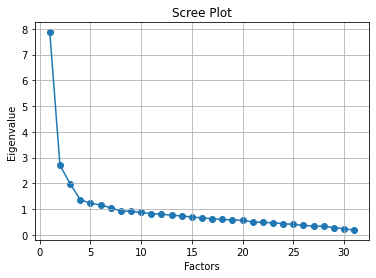

In [54]:
# Create scree plot using matplotlib
plt.scatter(range(1,questionaire_df.shape[1]+1),ev)
plt.plot(range(1,questionaire_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number of eigenvalues greater than one is considered as the number of factors.

Here, we can see only for 7-factors, eigenvalues are greater than one. It means we need to choose only 7 factors (or unobserved variables).

__Performing Factor Analysis__

In [56]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
fa.fit(questionaire_df)

FactorAnalyzer(n_factors=7, rotation='varimax', rotation_kwargs={})

In [58]:
factor_df=pd.DataFrame(fa.loadings_,index=questionaire_df.columns)
factor_df

,0,1,2,3,4,5,6
everbev,0.198609,0.150189,0.895004,0.208797,0.132124,0.146500,0.022863
everherb,0.118554,0.135638,0.191344,0.230681,0.072322,0.056328,0.275888
evermed,0.069258,0.014133,0.083585,0.046606,0.042753,0.049254,0.382219
oats,0.315879,0.222230,0.577303,0.324995,0.157480,0.142407,-0.002956
lacttreathome,0.164369,0.115254,0.232770,0.645362,0.164560,0.048374,0.022562
lacttreatstore,0.122540,0.171398,0.432104,0.063387,0.198694,0.003521,0.179635
brewersyeast,0.151742,0.104840,0.135783,0.759115,0.163396,0.026433,0.162711
coconutdrink,0.215432,0.090646,0.189765,0.213184,0.540814,0.122650,0.062053
sportdrink,0.215343,0.214649,0.453019,0.127890,0.400397,0.101493,0.134461
pinkdrink,-0.022256,0.062561,0.126163,0.126436,0.547179,0.026488,0.045078


* Factor 0 has high factor loadings for fruit,veg,beans,wholegrains,nuts,meat.

* Factor 1 has high factor loadings for increasebf,increaseexpress,massage,pumpboth,pumpafter

* Factor 2 has high factor loadings for everbev,oats

* Factor 3 has high factor loadings for lacttreathome,brewersyeast,seeds

* Factor 4 has high factor loadings for coconutdrink,sportdrink,pinkdrink

* Factor 5 has high factor loadings for beer

* Factor 6 has none of the high loadings for any variable and is not easily interpretable. Its good if we take only six factors.

__Performing Factor Analysis for 6 factors__

In [59]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(questionaire_df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [60]:
factor_df=pd.DataFrame(fa.loadings_,index=questionaire_df.columns)
factor_df

,0,1,2,3,4,5
everbev,0.179662,0.145763,0.887842,0.192520,0.103690,0.142331
everherb,0.119083,0.139673,0.226104,0.249323,0.063934,0.062603
evermed,0.075596,0.025610,0.121930,0.082592,0.038293,0.054431
oats,0.298654,0.216706,0.590053,0.310725,0.133938,0.140622
lacttreathome,0.154380,0.109423,0.253263,0.638298,0.150215,0.049424
lacttreatstore,0.115899,0.172955,0.459063,0.075077,0.177784,0.007863
brewersyeast,0.145918,0.102172,0.172322,0.771507,0.150839,0.031305
coconutdrink,0.208517,0.090722,0.222441,0.218198,0.534585,0.124797
sportdrink,0.204915,0.215248,0.488642,0.134079,0.379780,0.103060
pinkdrink,-0.026280,0.062784,0.151990,0.130657,0.542318,0.025780


In [61]:
# Get variance of each factors
fa.get_factor_variance()

(array([3.70303749, 3.29805757, 2.31592903, 1.9614138 , 0.95839826,
        0.91760569]),
 array([0.11945282, 0.10638895, 0.07470739, 0.06327141, 0.03091607,
        0.02960018]),
 array([0.11945282, 0.22584178, 0.30054916, 0.36382058, 0.39473665,
        0.42433683]))

Total 42% cumulative Variance explained by the 6 factors.

Referrence: https://www.datacamp.com/tutorial/introduction-factor-analysis